In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('../source_files/event_objectives_23_24.csv')
data.head()

Event Objective Objective Status Topic  \
0  Given the remaining diagnoses on the different...           Active   NaN   
1  Elicit physical exam features based on the ini...           Active   NaN   
2  Prioritize the initial differential diagnosis ...           Active   NaN   
3  Interpret the findings from the cardiovascular...           Active   NaN   
4               Define extra heart sounds. (EO-9211)           Active   NaN   

  # of events this topic is in (from Topic) Discipline / Role (from Topic)  \
0                                       NaN                            NaN   
1                                       NaN                            NaN   
2                                       NaN                            NaN   
3                                       NaN                            NaN   
4                                       NaN                            NaN   

  Curriculum Event 23-24 Event  \
0              NaN         NaN   
1              NaN         NaN   
2              NaN         NaN   
3              NaN         NaN   
4              NaN         NaN   

  Course Name (from Curriculum Event) (from Topic) Event Date  
0                                              NaN        NaN  
1                                              NaN        NaN  
2                                              NaN        NaN  
3                                              NaN        NaN  
4                                              NaN        NaN

In [19]:
data.rename(columns={"Discipline / Role (from Topic)": "discipline",
                     "Event Objective": "event_objective", 
                     "Topic": "topic", 
                     "# of events this topic is in (from Topic)": "number_of_topics",
                     "Curriculum Event": "curriculum_event", 
                     "23-24 Event": "23_24_curriculum_event", 
                     "Course Name (from Curriculum Event) (from Topic)": "course",
                     "Event Date": "date"}, inplace=True)

In [20]:
data.head()

event_objective Objective Status topic  \
0  Given the remaining diagnoses on the different...           Active   NaN   
1  Elicit physical exam features based on the ini...           Active   NaN   
2  Prioritize the initial differential diagnosis ...           Active   NaN   
3  Interpret the findings from the cardiovascular...           Active   NaN   
4               Define extra heart sounds. (EO-9211)           Active   NaN   

  number_of_topics discipline curriculum_event 23_24_curriculum_event course  \
0              NaN        NaN              NaN                    NaN    NaN   
1              NaN        NaN              NaN                    NaN    NaN   
2              NaN        NaN              NaN                    NaN    NaN   
3              NaN        NaN              NaN                    NaN    NaN   
4              NaN        NaN              NaN                    NaN    NaN   

  date  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [21]:
discipline_counts = data['discipline'].value_counts()
discipline_counts

discipline
Anatomy                  916
Pathology                865
Physiology               698
Pharmacology             616
Histology                554
Neuroscience             424
Pathophysiology          419
Practitioner             386
Microbiology             377
Biochemistry             302
---                      275
Advocate                 258
Immunology               252
Professional             196
Genetics                 158
Psychiatry               128
Pediatrics               106
Embryology                97
Educator                  95
Scholar                   86
OBGYN                     56
Communicator              44
Leader                    35
Nutrition                 34
Collaborator              19
Physiology,Physiology      6
Name: count, dtype: int64

/var/folders/qs/mmc5bbzd32n4826rw9lqw39m0000gn/T/ipykernel_25097/3418598239.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discipline_counts.index, y=discipline_counts.values, palette='viridis')


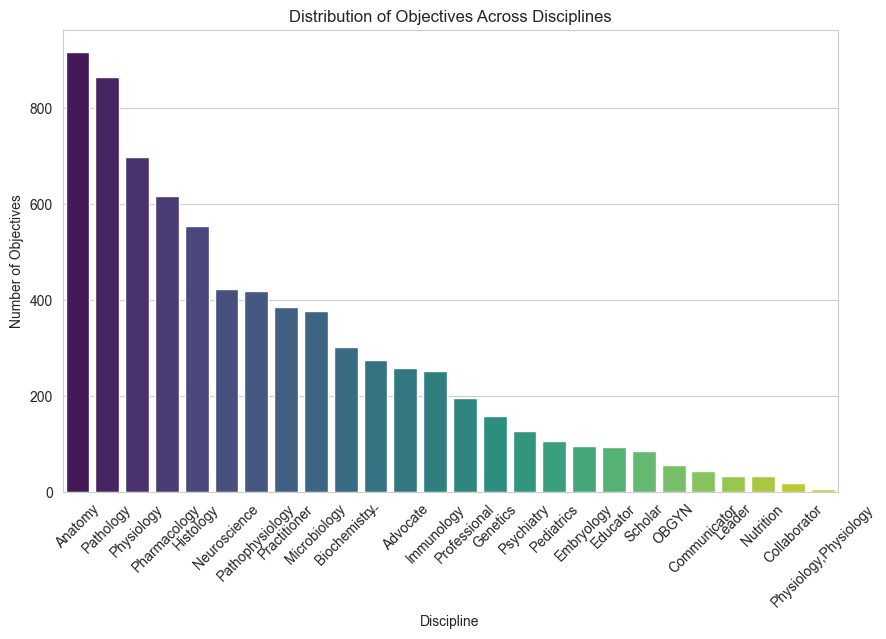

In [22]:
# VISUALIZATION WITH A BAR CHART

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=discipline_counts.index, y=discipline_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Discipline')
plt.ylabel('Number of Objectives')
plt.title('Distribution of Objectives Across Disciplines')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [23]:
pivot_table = pd.pivot_table(data, values='event_objective', index='course', columns='discipline', aggfunc='count', fill_value=0)
pivot_table

discipline                                          ---  Advocate  Anatomy  \
course                                                                       
M1-01 Foundation of Medical Practice (RMD-560)        0        28        0   
M1-02 Host Defense & Host Response (RMD-561)          0        23        0   
M1-03 Vital Fluids (RMD-574)                          0         8      102   
M1-04 Vital Gases (RMD-575)                           0         8       58   
M1-04 Vital Gases (RMD-575), M1-04 Vital Gases ...    0         0        0   
M1-05 Food to Fuel (RMD-563)                          0         6       98   
M1-06 Movement and Mechanics (RMD-564)                0         9      230   
M1-07 Brain Behavior and Cognition (RMD-565)          0        35      284   
M1-08 Bedside Clinical Skills (BCS-M1)                0         0        0   
M2-01 Sexuality and Reproduction (RMD-566)            0        17      107   
M2-02 Growth Development and the Life Cycle (RM...    0        47        0   
M2-03 Introduction to Hematology (RMD-576)            0         7        0   
M2-04 Introduction to Oncology (RMD-577)              0         1        3   
M2-05 Complex Cases and Transition to Clerkship...    0        14        0   
M2-06 Bedside Clinical Skills I (BCS-M2)              0         0        0   
M3-01 Internal Medicine                              30         3        0   
M3-02 Neurology                                      25         0        0   
M3-03 Psychiatry                                     47         0        0   
M3-04 Pediatrics                                     36         0        0   
M3-05 Primary Care                                   37         0        0   
M3-06 General Surgery                                28         0        0   
M3-07 Obstetrics and Gynecology                      31         0        0   
M3-08 Longitudinal Course                             0        14        0   
M4-01 Emergency Medicine                             21         0        0   
M4-03 Clinical Bridge                                15         0        6   
M4-04 Longitudinal Course                             0         0        0   

discipline                                          Biochemistry  \
course                                                             
M1-01 Foundation of Medical Practice (RMD-560)                 2   
M1-02 Host Defense & Host Response (RMD-561)                  17   
M1-03 Vital Fluids (RMD-574)                                  27   
M1-04 Vital Gases (RMD-575)                                   17   
M1-04 Vital Gases (RMD-575), M1-04 Vital Gases ...             0   
M1-05 Food to Fuel (RMD-563)                                 139   
M1-06 Movement and Mechanics (RMD-564)                        26   
M1-07 Brain Behavior and Cognition (RMD-565)                   0   
M1-08 Bedside Clinical Skills (BCS-M1)                         0   
M2-01 Sexuality and Reproduction (RMD-566)                     6   
M2-02 Growth Development and the Life Cycle (RM...            22   
M2-03 Introduction to Hematology (RMD-576)                    20   
M2-04 Introduction to Oncology (RMD-577)                       4   
M2-05 Complex Cases and Transition to Clerkship...             9   
M2-06 Bedside Clinical Skills I (BCS-M2)                       0   
M3-01 Internal Medicine                                        0   
M3-02 Neurology                                                0   
M3-03 Psychiatry                                               0   
M3-04 Pediatrics                                               0   
M3-05 Primary Care                                             0   
M3-06 General Surgery                                          0   
M3-07 Obstetrics and Gynecology                                0   
M3-08 Longitudinal Course                                      0   
M4-01 Emergency Medicine                                       0   
M4-03 Clinical Bridge                          

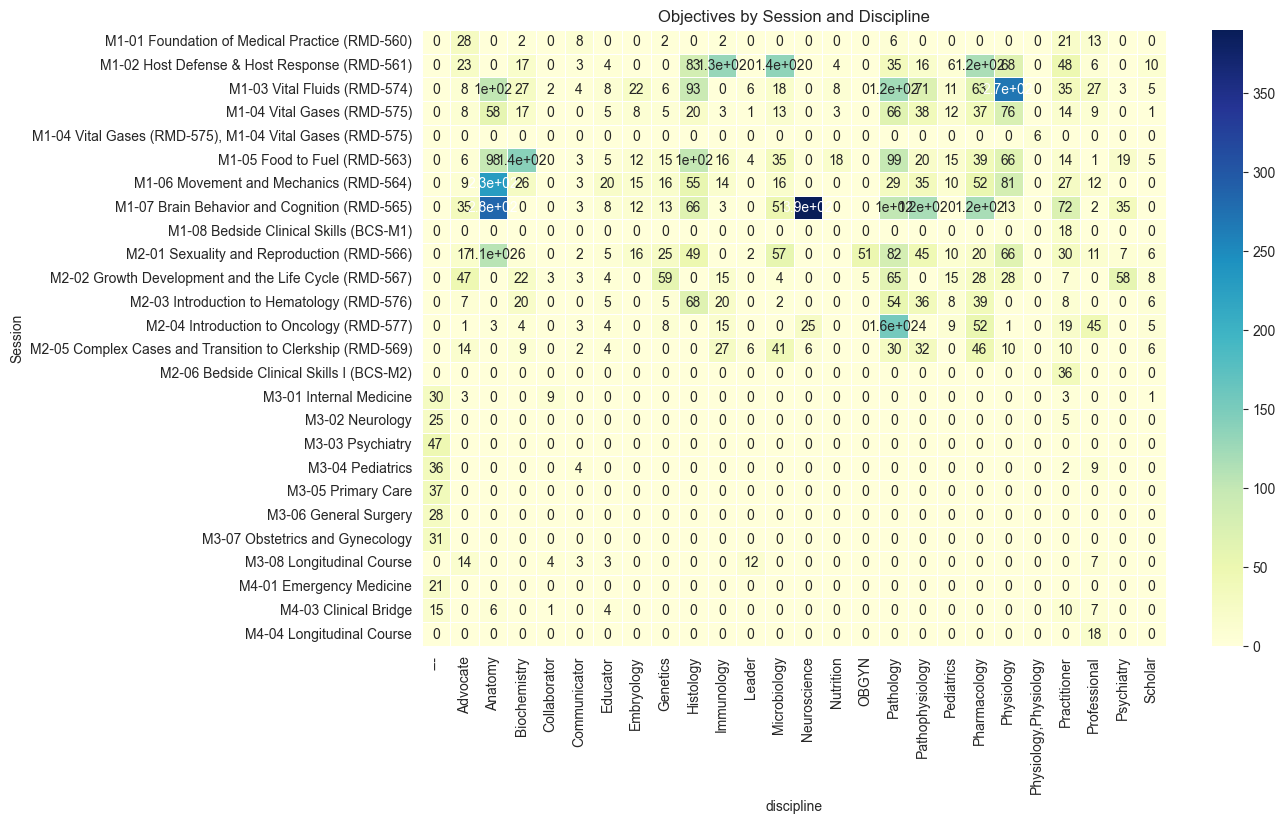

In [24]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=.5)

# Add labels and title
plt.xlabel('discipline')
plt.ylabel('Session')
plt.title('Objectives by Session and Discipline')

# Show the plot
plt.show()

In [25]:
from collections import Counter
from wordcloud import WordCloud

# Combine all objectives into a single text for each discipline
discipline_text = data.groupby('discipline')['event_objective'].apply(' '.join).reset_index()

# Generate word clouds for each discipline
for index, row in discipline_text.iterrows():
    discipline = row['discipline']
    text = row['event_objective']
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {discipline}')
    plt.show()

ModuleNotFoundError: No module named 'wordcloud'